# Context


Information Technology in India is a vast industry that comprises information technology services, consulting, and outsourcing. The IT industry accounted for 8% of India's GDP in 2020. The IT and BPM industry's revenue is estimated at US Dollar 194 billion in FY 2021, an increase of 2.3 % YoY. The domestic revenue of the IT industry is estimated at US Dollar 45 billion and export revenue is estimated at US Dollar 150 billion in FY 2021. 

The IT-BPM sector overall employs 4.5 million people as of March 2021. The Indian IT-BPM industry has the highest employee attrition rate. In recent years the industry has witnessed skyrocketing resignations cutting across the hierarchy. As a global outsourcing hub, the Indian IT industry is infamous for exploiting cheap labor. As the IT-BPM sector evolves, many are concerned that artificial intelligence (AI) will drive significant automation and destroy jobs in the coming years.

The software industry includes businesses for the development, maintenance, and publication of software that are using different business models, mainly either "license/maintenance based" (on-premises) or "Cloud-based" (such as SaaS, PaaS, IaaS, MBaaS, MSaaS, DCaaS, etc.). The industry also includes software services, such as training, documentation, consulting, and data recovery.

# Content
This Dataset contains information of 22700+ Software Professionals with different features like their Salaries **(₹)**, Name of the Company, Company Rating, Number of times Salaries Reported, and Location of the Company.

Structure of the Dataset
Software Professional Salaries - 2022
├── Rating

├── Company Name

├── Job Title


├── Salary (Indian Rupee - ₹)
├── Salaries Reported

├── Location

├── Employment Status

└── Job Roles


In [ ]:
# Importing all needed libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("fivethirtyeight")


print("All Modules & Settings Initialized ")

ModuleNotFoundError: No module named 'plotly'

In [15]:
# Import the data
from urllib.request import urlretrieve 
URL = "Salary Dataset.csv"
salary_data = pd.read_csv(URL)

print("Data Imported Successfully")

Data Imported Successfully


# Cleaning, Exploring, Visualizing & Playing with the data.

I first did a bit of cleaning here and there. 

Deleting and adding etc.

Then, did a bit of exploration and got to know my data.

Finally, I visualised to get some insights from the data provided.


In [16]:

df = pd.read_csv("Salary Dataset.csv")

# Display first rows
print("\n--- Head ---")
display(df.head())

# ============================
# 3. Basic Info
# ============================
print("\n--- Shape ---")
print(df.shape)

print("\n--- Info ---")
print(df.info())

print("\n--- Descriptive Statistics (numeric) ---")
display(df.describe())

print("\n--- Descriptive Statistics (categorical) ---")
display(df.describe(include='object'))

# ============================
# 4. Check Missing Values
# ============================
print("\n--- Missing Values ---")
print(df.isnull().sum())

# ============================
# 5. Check Duplicates
# ============================
print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# ============================
# 6. Clean Column Names (optional)
# ============================
df.columns = df.columns.str.strip().str.replace(" ", "_")

print("\n--- Cleaned Column Names ---")
print(df.columns)

# ============================
# 7. Detect Outliers in Salary
# ============================
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("\n--- Salary Outlier Limits ---")
print(f"Lower Limit: {lower}")
print(f"Upper Limit: {upper}")

outliers = df[(df["Salary"] < lower) | (df["Salary"] > upper)]
print(f"Total Salary Outliers: {len(outliers)}")

# ============================
# 8. Handle Outliers (optional)
# ============================
df["Salary"] = np.where(df["Salary"] > upper, upper,
                np.where(df["Salary"] < lower, lower, df["Salary"]))

# ============================
# 9. Extract Key Insights
# ============================

print("\n--- Unique Companies ---")
print(df["Company_Name"].nunique())

print("\n--- Unique Job Titles ---")
print(df["Job_Title"].nunique())

print("\n--- Unique Locations ---")
print(df["Location"].nunique())

print("\n--- Top 10 Companies by Count ---")
display(df["Company_Name"].value_counts().head(10))

print("\n--- Most Common Job Titles ---")
display(df["Job_Title"].value_counts().head(10))

print("\n--- Average Salary by Job Title ---")
display(df.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False).head(10))

print("\n--- Average Salary by Location ---")
display(df.groupby("Location")["Salary"].mean().sort_values(ascending=False).head(10))

# ============================
# 10. Final Cleaned Dataset
# ============================
print("\n--- Final Cleaned Dataset Shape ---")
print(df.shape)

df.to_csv("Cleaned_Salary_Dataset.csv", index=False)



--- Head ---


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android



--- Shape ---
(22770, 8)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB
None

--- Descriptive Statistics (numeric) ---


,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000



--- Descriptive Statistics (categorical) ---


,Company Name,Job Title,Location,Employment Status,Job Roles
count,22769,22770,22770,22770,22770
unique,11260,1080,10,4,11
top,Tata Consultancy Services,Software Development Engineer,Bangalore,Full Time,SDE
freq,271,2351,8264,20083,8183



--- Missing Values ---
Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

--- Duplicate Rows ---
0

--- Cleaned Column Names ---
Index(['Rating', 'Company_Name', 'Job_Title', 'Salary', 'Salaries_Reported',
       'Location', 'Employment_Status', 'Job_Roles'],
      dtype='object')

--- Salary Outlier Limits ---
Lower Limit: -600000.0
Upper Limit: 1800000.0
Total Salary Outliers: 1156

--- Unique Companies ---
11260

--- Unique Job Titles ---
1080

--- Unique Locations ---
10

--- Top 10 Companies by Count ---


Company_Name
Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
IBM                               122
Wipro                             122
HCL Technologies                  102
Fresher                           101
Capgemini                         101
Name: count, dtype: int64


--- Most Common Job Titles ---


Job_Title
Software Development Engineer                   2351
Android Developer                               2029
Software Development Engineer (SDE)             1614
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
Name: count, dtype: int64


--- Average Salary by Job Title ---


Job_Title
oracle dba                                               1800000.0
Tech Lead Front End                                      1800000.0
Tech Lead - IOS                                          1800000.0
Senior Mobile Product Manager                            1800000.0
Senior Front End Developer & Solution Architect          1800000.0
Applications/Software Development/Support Or Engineer    1800000.0
Senior Manager Software Development Engineering          1800000.0
Staff Software Development Engineer                      1800000.0
Sr Android Engineer                                      1800000.0
Senior Software Development Engineer (Senior SDE)        1800000.0
Name: Salary, dtype: float64


--- Average Salary by Location ---


Location
Mumbai            861811.182911
Bangalore         682696.685382
Pune              644857.372071
Kolkata           642595.505618
Hyderabad         631311.108126
Jaipur            611851.851852
New Delhi         608799.555556
Chennai           561302.092758
Madhya Pradesh    555706.425806
Kerala            538762.666667
Name: Salary, dtype: float64


--- Final Cleaned Dataset Shape ---
(22770, 8)


Now I will Give some insights from the data

Q1 : Which companies pay significantly above/below the industry benchmark for each job title after normalizing by location cost?

In [26]:
# Step 1: Industry benchmark per job title
industry_benchmark = df.groupby("Job_Title")["Salary"].mean().rename("Benchmark")

# Step 2: Location multiplier (average salary of each location)
location_factor = df.groupby("Location")["Salary"].mean().rename("Location_Avg")

# Step 3: Merge back into original dataframe
df2 = df.merge(industry_benchmark, on="Job_Title").merge(location_factor, on="Location")

# Step 4: Normalize actual salary by location cost
df2["Normalized_Salary"] = df2["Salary"] / df2["Location_Avg"]

# Step 5: Calculate deviation from benchmark
df2["Deviation_from_Benchmark"] = df2["Normalized_Salary"] - (df2["Benchmark"] / df2["Location_Avg"])

# Step 6: Find companies that consistently overpay/underpay
result = (
    df2.groupby("Company_Name")["Deviation_from_Benchmark"]
       .mean()
       .sort_values(ascending=False)
)

display(result.head(10))  # Top overpaying companies
display(result.tail(10))  # Underpaying companies


Company_Name
AM Technical Solutions    2.566001
Saagara                   2.447318
Axcensa                   2.329788
KH TEC                    2.225340
Sunpro Cyber Systems      2.175924
Nisum                     2.175924
Digitrix Technologies     2.175924
AWS Elemental             2.148022
Infosecurity              2.148022
Premtek                   2.148022
Name: Deviation_from_Benchmark, dtype: float64

Company_Name
Appoholics                     -1.671924
Commonfloor                    -1.673352
Klimb.io                       -1.705040
Travel Troops Global Pvt Ltd   -1.716723
PatientMD                      -1.765665
Data Migration Resources       -1.811322
RabbitHole                     -1.832988
ESPN                           -1.845622
Udayy                          -1.876467
Crimson Interactive            -2.175393
Name: Deviation_from_Benchmark, dtype: float64

Q2 : Predict the expected salary for each (Job Title, Location, Company Rating) combination using multi-dimensional median modeling

In [27]:
# Step 1: Compute median salary by job, location, and rating
median_model = (
    df.groupby(["Job_Title", "Location", "Rating"])["Salary"]
      .median()
      .rename("Predicted_Salary")
      .reset_index()
)

display(median_model.head(20))


,Job_Title,Location,Rating,Predicted_Salary
0,"""ORACLE DBA""",Bangalore,3.8,400000.0
1,"""ORACLE DBA""",Bangalore,4.1,168000.0
2,".NET Developer, Python",Bangalore,3.9,468000.0
3,.NET/Android Developer,Hyderabad,2.6,100000.0
4,AEM Front End Developer - Intern,Hyderabad,3.5,108000.0
5,ASAP Software Development Engineer,Kerala,4.6,1138368.0
6,AVP-Java Developer,Chennai,3.8,1800000.0
7,AVP-Java Developer,Chennai,3.9,1800000.0
8,AVP-Java Developer,Hyderabad,3.6,1800000.0
9,AVP-Java Developer,Hyderabad,3.9,1800000.0


Q3. Identify underpaid employees by comparing their salary against a weighted expected salary (job + company + location weights)

Weights based on relative importance:

Job title = 50%
Company   = 30%
Location  = 20%

In [28]:
# Step 1: Compute weighted baseline salary
job_avg = df.groupby("Job_Title")["Salary"].mean().rename("Job_Avg")
company_avg = df.groupby("Company_Name")["Salary"].mean().rename("Company_Avg")
location_avg = df.groupby("Location")["Salary"].mean().rename("Location_Avg")

# Step 2: Merge into original df
df3 = df.merge(job_avg, on="Job_Title") \
        .merge(company_avg, on="Company_Name") \
        .merge(location_avg, on="Location")

# Step 3: Weighted expected salary
df3["Expected_Salary"] = (
    df3["Job_Avg"] * 0.50 +
    df3["Company_Avg"] * 0.30 +
    df3["Location_Avg"] * 0.20
)

# Step 4: Salary gap
df3["Salary_Gap"] = df3["Salary"] - df3["Expected_Salary"]

# Step 5: Find most underpaid and overpaid roles
display(df3.sort_values("Salary_Gap").head(15))   # underpaid
display(df3.sort_values("Salary_Gap", ascending=False).head(15))  # overpaid


,Rating,Company_Name,Job_Title,Salary,Salaries_Reported,Location,Employment_Status,Job_Roles,Job_Avg,Company_Avg,Location_Avg,Expected_Salary,Salary_Gap
16587,4.1,Dream11,Software Development Engineer (SDE1),100000.0,2,Mumbai,Full Time,SDE,1.126000e+06,1.326667e+06,861811.182911,1.133362e+06,-1.033362e+06
19759,3.6,BNY Mellon,Lead Software Development Engineer In Test (SDET),200000.0,1,Pune,Full Time,SDE,1.572727e+06,9.369600e+05,644857.372071,1.196423e+06,-9.964231e+05
4208,3.9,Sabre,Lead Database Administrator,100000.0,2,Bangalore,Full Time,Database,1.400000e+06,8.444444e+05,682696.685382,1.089873e+06,-9.898727e+05
19683,3.8,Sokrati,Software Development Engineer III,24000.0,1,Pune,Full Time,SDE,1.502818e+06,4.160000e+05,644857.372071,1.005181e+06,-9.811806e+05
16580,3.8,Amazon,Software Development Engineer (SDE) II,100000.0,2,Mumbai,Full Time,SDE,1.243507e+06,9.312228e+05,861811.182911,1.073483e+06,-9.734828e+05
12624,4.0,Yahoo,Senior Software Development Engineer,100000.0,2,Bangalore,Full Time,SDE,9.916114e+05,1.412500e+06,682696.685382,1.056095e+06,-9.560951e+05
12213,4.1,Sprinklr,Senior Software Development Engineer In Test,100000.0,5,Bangalore,Full Time,SDE,1.161200e+06,1.091667e+06,682696.685382,1.044639e+06,-9.446393e+05
4195,3.9,Sabre,Senior Oracle Database Administrator,100000.0,2,Bangalore,Full Time,Database,1.297241e+06,8.444444e+05,682696.685382,1.038493e+06,-9.384934e+05
14120,3.9,Comcast,Software Development Engineer III,200000.0,2,Chennai,Full Time,SDE,1.502818e+06,9.058824e+05,561302.092758,1.135434e+06,-9.354342e+05
19189,3.6,TSYS|Total System Services,Senior Software Development Engineer In Test,100000.0,2,Pune,Full Time,SDE,1.161200e+06,9.400000e+05,644857.372071,9.915715e+05,-8.915715e+05


,Rating,Company_Name,Job_Title,Salary,Salaries_Reported,Location,Employment_Status,Job_Roles,Job_Avg,Company_Avg,Location_Avg,Expected_Salary,Salary_Gap
145,4.1,First Student,Android Developer - Intern,1800000.0,1,Bangalore,Intern,Android,248022.222222,440753.246753,682696.685382,392776.422214,1.407224e+06
1760,4.0,Raja Software Labs,Android Developer - Intern,1800000.0,1,New Delhi,Intern,Android,248022.222222,663272.727273,608799.555556,444752.840404,1.355247e+06
17751,3.7,HCL Technologies,Software Development Engineer - Intern,1800000.0,1,New Delhi,Intern,SDE,397662.319066,636274.509804,608799.555556,511473.423585,1.288527e+06
10333,4.0,(no)name,Junior Java Developer,1800000.0,1,Hyderabad,Full Time,Java,359698.327273,719666.666667,631311.108126,522011.385262,1.277989e+06
22030,4.1,Virtual Employee,Web Developer,1800000.0,1,Bangalore,Full Time,Web,430840.947245,662000.000000,682696.685382,550559.810699,1.249440e+06
10500,4.3,Meta,Junior Java Developer,1800000.0,1,Hyderabad,Full Time,Java,359698.327273,846000.000000,631311.108126,559911.385262,1.240089e+06
21589,3.8,Cognizant Technology Solutions,Test Engineer - Contractor,1800000.0,1,Bangalore,Contractor,Testing,512906.666667,567458.333333,682696.685382,563230.170410,1.236770e+06
22270,4.1,HealthGraph India,Web Developer,1800000.0,1,Bangalore,Full Time,Web,430840.947245,720000.000000,682696.685382,567959.810699,1.232040e+06
6517,3.6,Tech Mahindra,Front End Developer,1800000.0,1,New Delhi,Full Time,Frontend,567868.736544,550105.263158,608799.555556,570725.858330,1.229274e+06
21129,4.3,Graduate Student,Test Engineer,1800000.0,1,Bangalore,Full Time,Testing,494449.607306,623636.363636,682696.685382,570855.049820,1.229145e+06


Q4. Create a Stability Score for each company using variance, IQR, and count of salary reports

A composite score:

Stability = (1 / (1 + Salary STD)) * (IQR_Score) * (ReportsWeight)

In [29]:
# Step 1: Compute metrics
company_stats = df.groupby("Company_Name").agg(
    Salary_STD=("Salary", "std"),
    Salary_IQR=("Salary", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    Reports=("Salaries_Reported", "sum")
).reset_index()

# Step 2: Normalize columns
for col in ["Salary_STD", "Salary_IQR", "Reports"]:
    company_stats[col + "_Norm"] = (
        (company_stats[col] - company_stats[col].min()) /
        (company_stats[col].max() - company_stats[col].min())
    )

# Step 3: Compute stability score
company_stats["Stability_Score"] = (
    (1 - company_stats["Salary_STD_Norm"]) *
    (1 - company_stats["Salary_IQR_Norm"]) *
    company_stats["Reports_Norm"]
)

# Step 4: Rank companies by stability
display(company_stats.sort_values("Stability_Score", ascending=False).head(20))


,Company_Name,Salary_STD,Salary_IQR,Reports,Salary_STD_Norm,Salary_IQR_Norm,Reports_Norm,Stability_Score
4486,Infosys,307106.728497,288000.0,2032,0.244546,0.192000,0.770778,0.470488
9160,Tata Consultancy Services,332610.159940,330000.0,1286,0.264855,0.220000,0.487666,0.279634
313,Accenture,374675.297217,300000.0,894,0.298351,0.200000,0.338899,0.190231
10400,Wipro,301562.494267,300000.0,651,0.240132,0.200000,0.246679,0.149955
660,Amazon,606030.834321,1111500.0,2636,0.482577,0.741000,1.000000,0.134013
2094,Cognizant Technology Solutions,370925.526897,400000.0,591,0.295365,0.266667,0.223909,0.115701
5875,Mindtree,372012.368423,318000.0,431,0.296230,0.212000,0.163188,0.090499
9206,Tech Mahindra,349922.642078,291000.0,372,0.278640,0.194000,0.140797,0.081862
4180,IBM,472795.971450,613000.0,457,0.376483,0.408667,0.173055,0.063806
1743,Capgemini,365804.059438,300000.0,296,0.291287,0.200000,0.111954,0.063475


Q5:Using advanced roll-up: find the job titles for which salary increases the most when rating increases

In [30]:
# Step 1: Group by job title & rating
role_rating = df.groupby(["Job_Title", "Rating"])["Salary"].mean().reset_index()

# Step 2: Compute slope for each job title
slopes = []
for job in role_rating["Job_Title"].unique():
    temp = role_rating[role_rating["Job_Title"] == job]
    if len(temp["Rating"].unique()) > 1:  # need >1 point to compute slope
        slope = np.polyfit(temp["Rating"], temp["Salary"], 1)[0]
        slopes.append((job, slope))

# Step 3: Convert to DataFrame
slopes_df = pd.DataFrame(slopes, columns=["Job_Title", "Salary_Rating_Slope"])
slopes_df = slopes_df.sort_values("Salary_Rating_Slope", ascending=False)

display(slopes_df.head(15))


,Job_Title,Salary_Rating_Slope
333,Senior Oracle Database Administrator - Contractor,1.300000e+07
429,Software Engineer(Python Programmer),1.200000e+07
44,Backend Developer - Contractor,7.840000e+06
331,Senior Oracle Applications Database Administrator,7.380000e+06
203,Lead SQL Database Administrator,7.000000e+06
212,Microsoft SQL Server Database Administrator,6.500000e+06
232,Mobile Tester,5.500000e+06
337,Senior Python Engineer,4.928571e+06
87,Embedded Software Development Engineer,4.000000e+06
97,Front End Developer (Angular),4.000000e+06


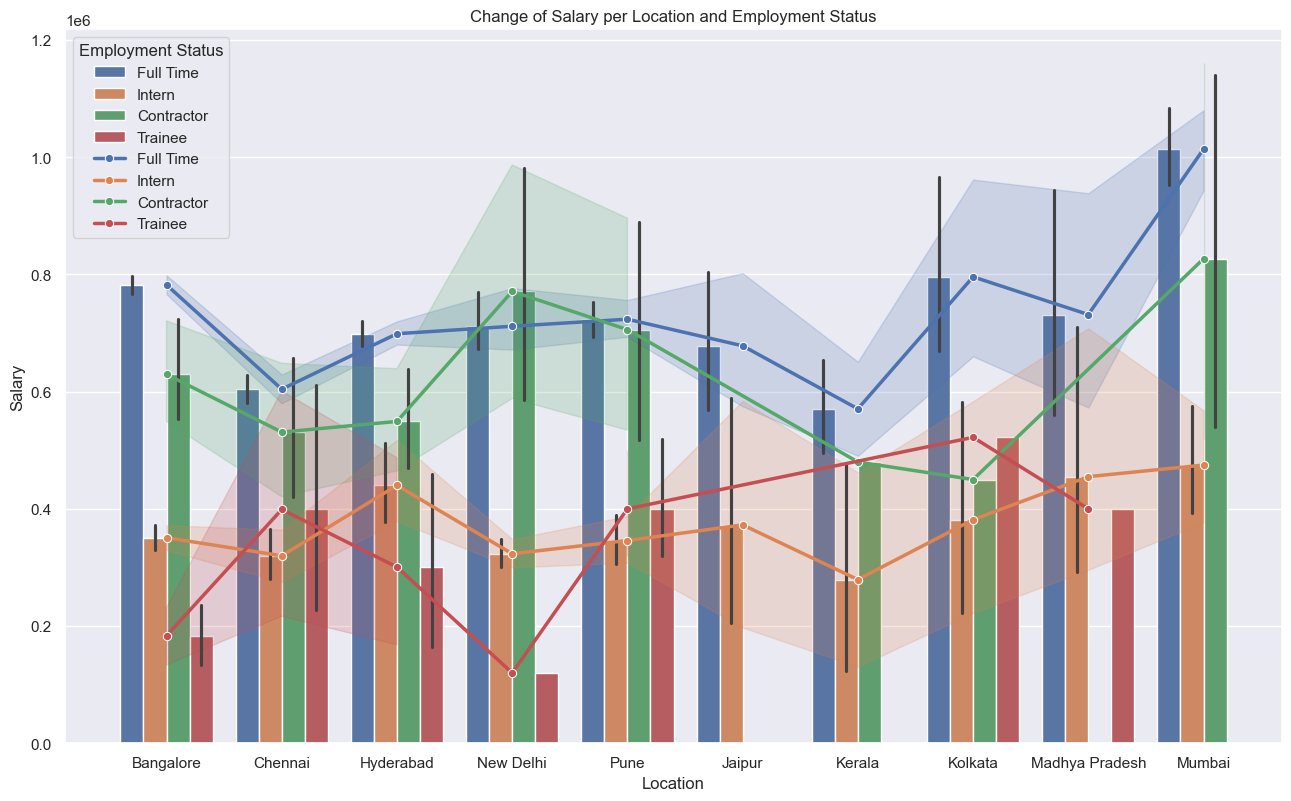

In [25]:
# What is the change of salary in different locations?
sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.barplot(data=salary_data, x="Location", y="Salary", hue="Employment Status")
sns.lineplot(data=salary_data, x="Location", y="Salary", hue="Employment Status", linewidth=2.5, marker='o')

# Descriptions
plt.title("Change of Salary per Location and Employment Status")
plt.show()

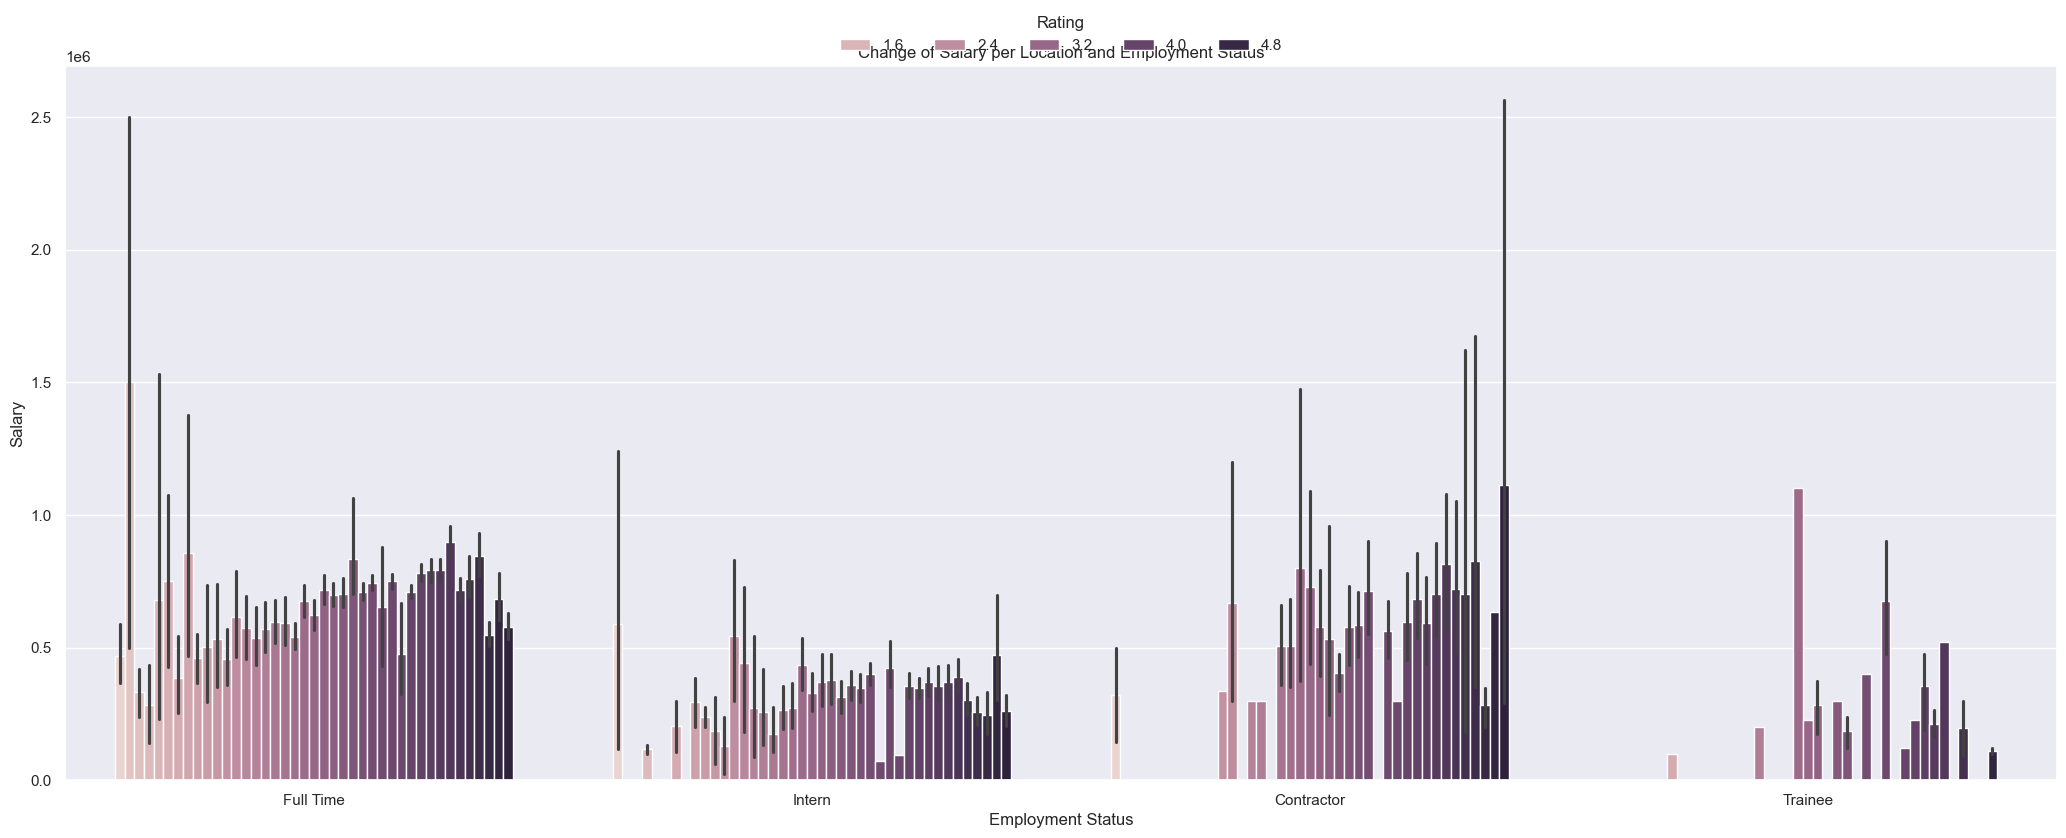

In [6]:
# How does Salary change with rating and employment status?
sns.set(rc={'figure.figsize':(25.7,9.27)})
# figure_1 = sns.lineplot(data=salary_data, x="Employment Status", y="Salary", hue="Rating")
figure_1 = sns.barplot(data=salary_data, x="Employment Status", y="Salary", hue="Rating")
sns.move_legend(figure_1, "lower center", bbox_to_anchor=(.5, 1), ncol=21, title="Rating", frameon=False)

# Descriptions
plt.title("Change of Salary per Location and Employment Status")
plt.show()

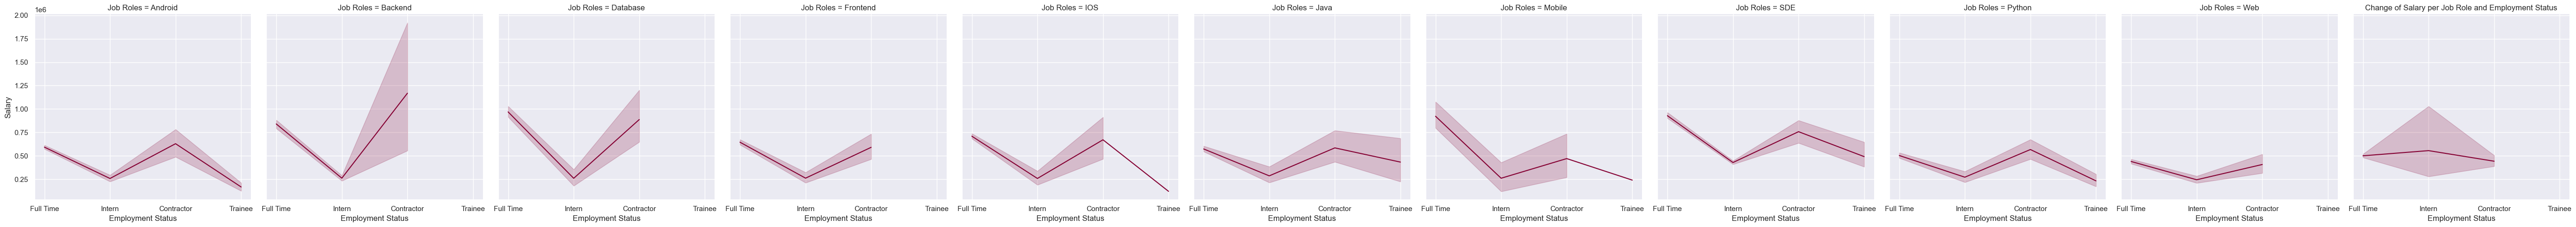

In [7]:
# Change of Salary per Job Role and Employment Status
sns.relplot(col="Job Roles", y="Salary", kind="line",x='Employment Status', data=salary_data, color="#840032")

# Descriptions
plt.title("Change of Salary per Job Role and Employment Status")
plt.show()

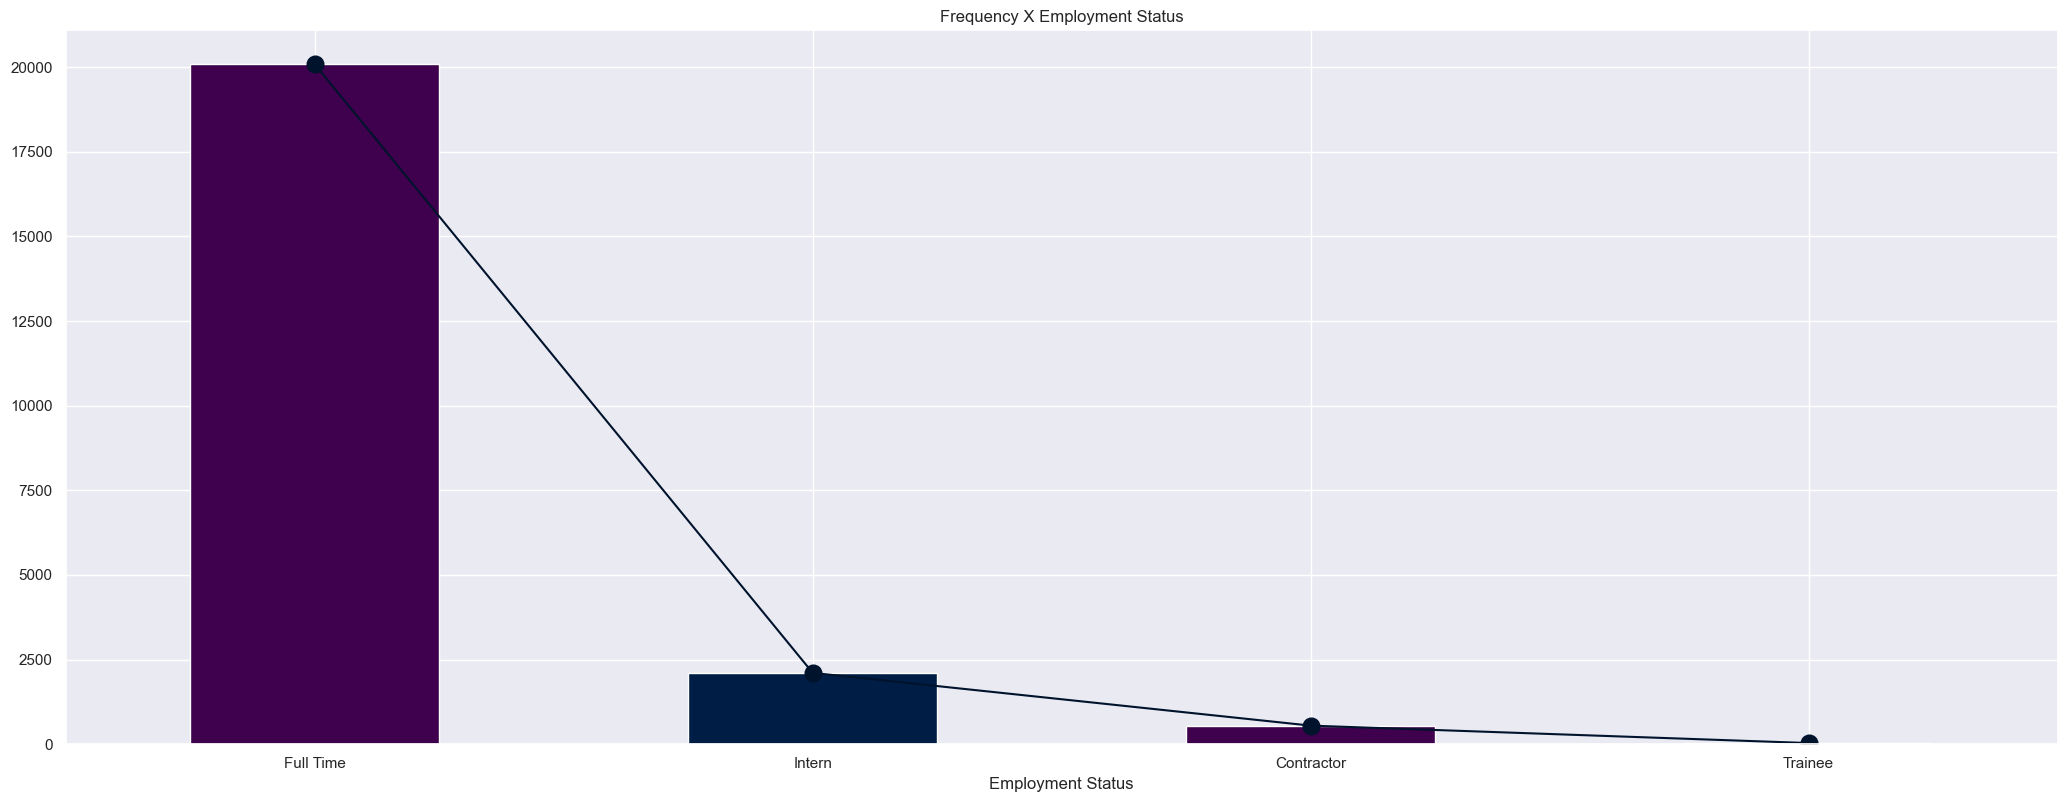

In [8]:
# Frequency of Employment Status
salary_data["Employment Status"].value_counts().plot.line(color=["#00132d"], marker="o", markersize=12)
salary_data["Employment Status"].value_counts().plot.bar(color=["#3f004d", "#001e45"])

# Descriptions
plt.title("Frequency X Employment Status")
plt.xticks(rotation = 360)
plt.show()

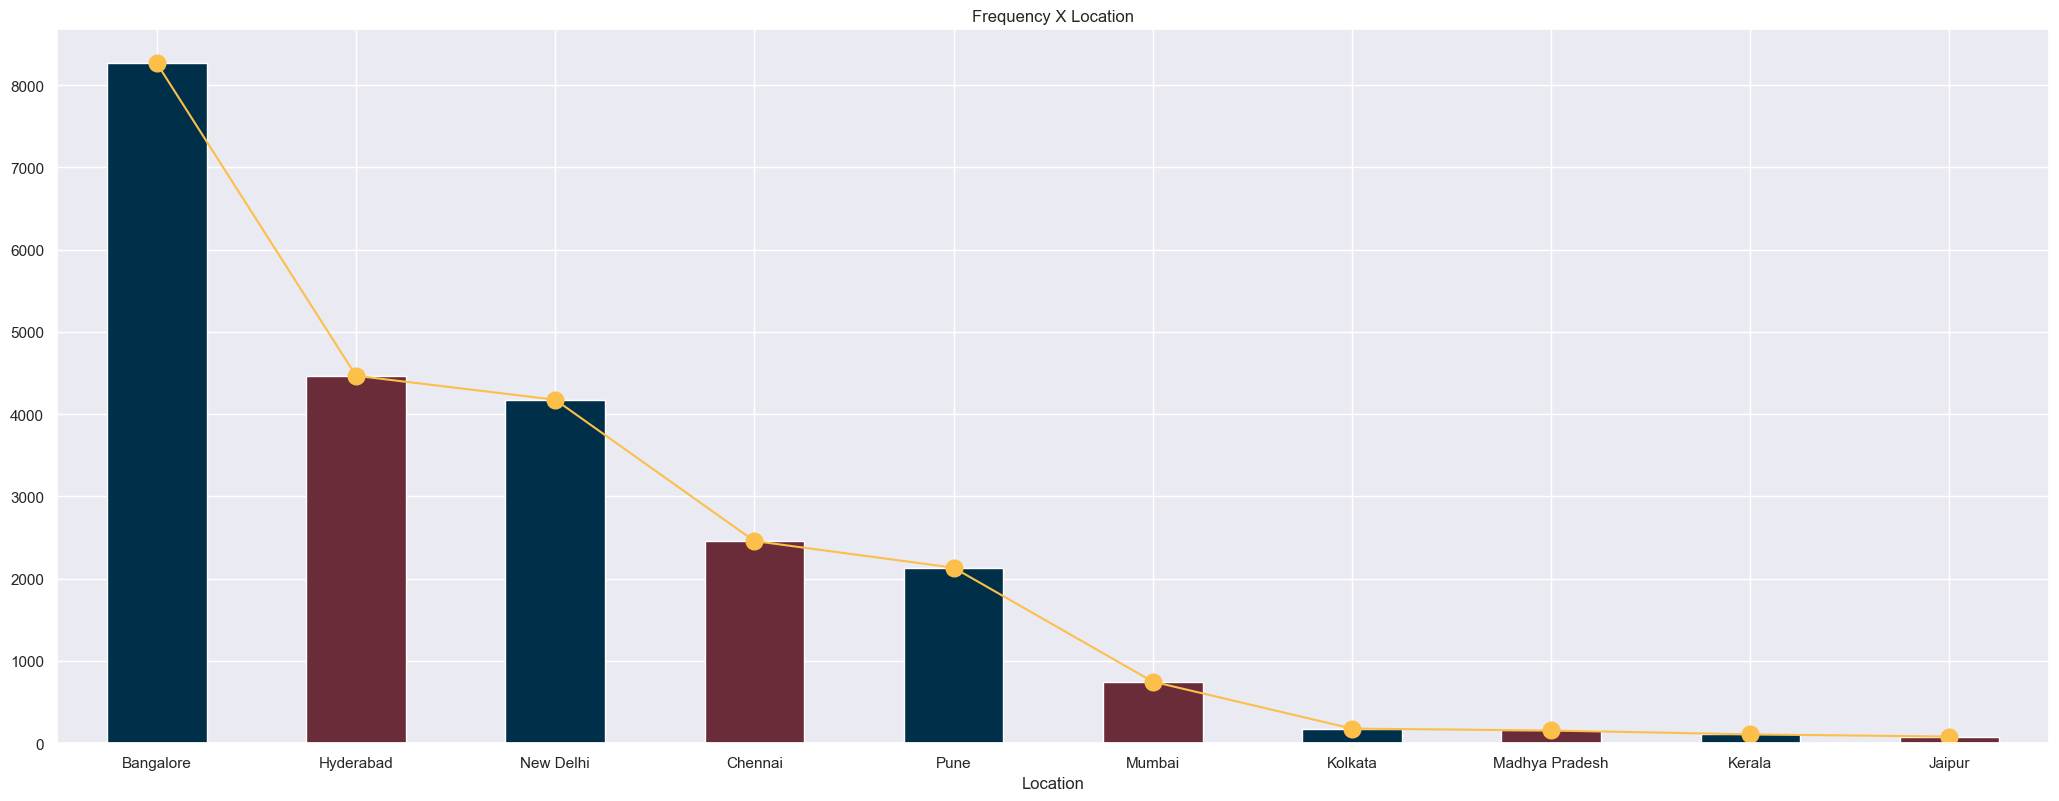

In [9]:
# Frequency of Location
salary_data["Location"].value_counts().plot.bar(color=["#003049", "#6B2C39"])

salary_data["Location"].value_counts().plot.line(color=["#FCBF49"], marker="o", markersize=12)

# Descriptions
plt.title("Frequency X Location")
plt.show()

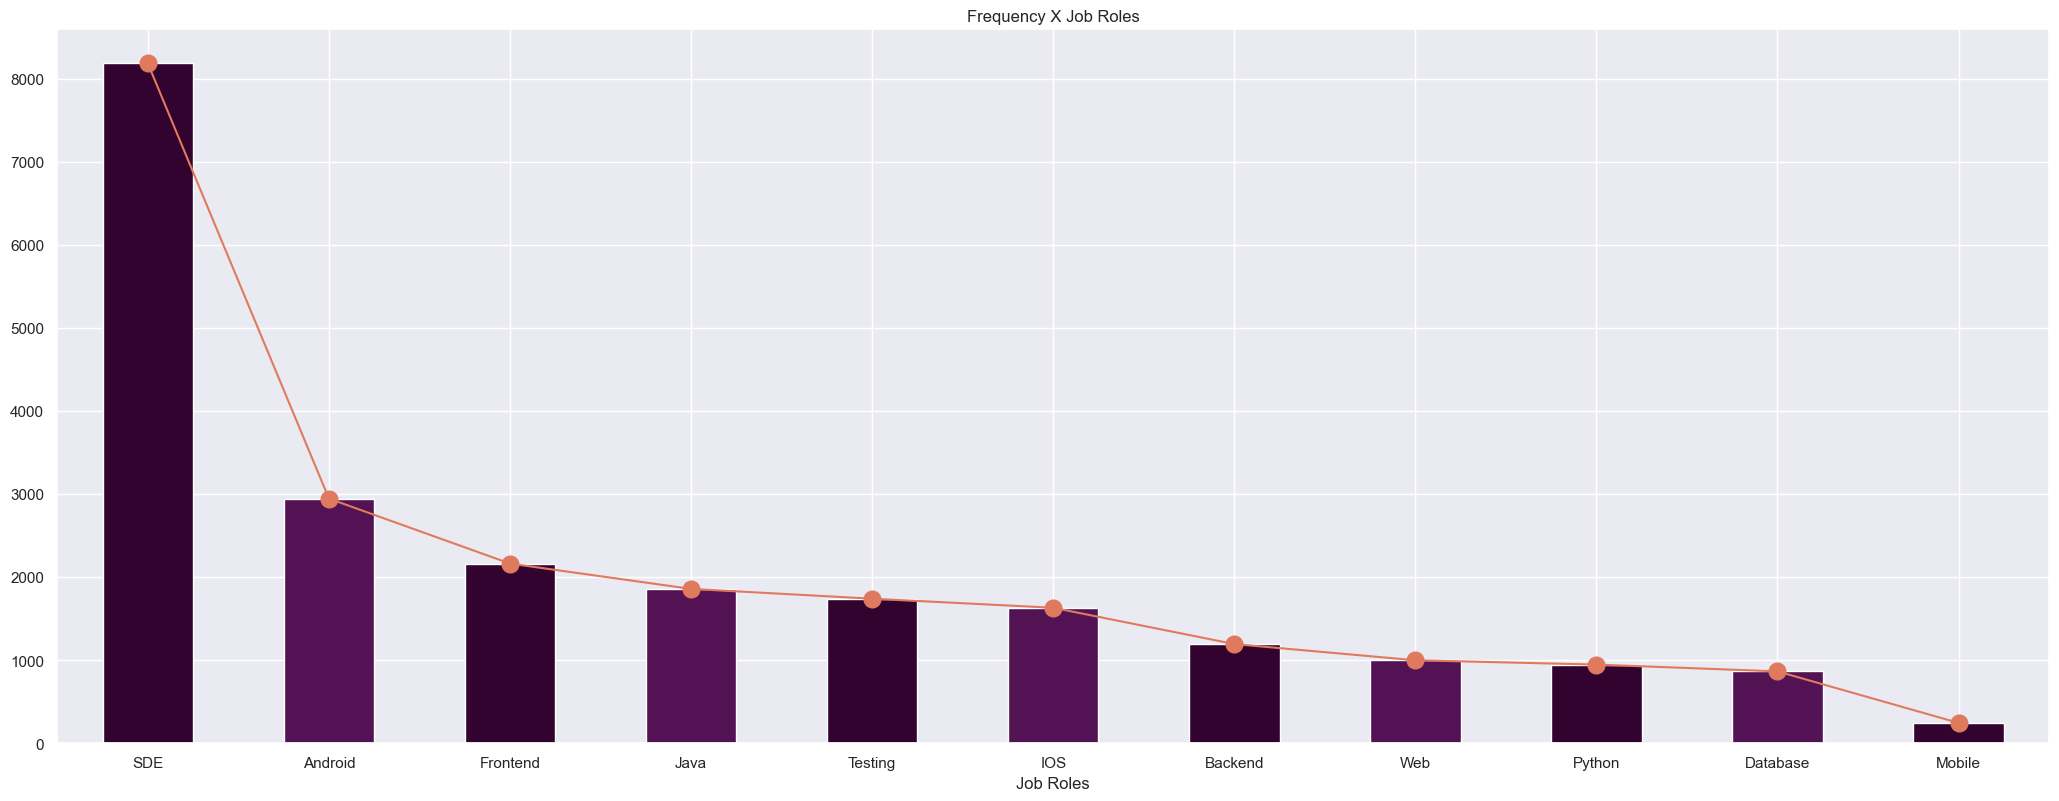

In [10]:
# Frequency of Job Roles
salary_data["Job Roles"].value_counts().plot.line(color=["#e07a5f"], marker="o", markersize=12)
salary_data["Job Roles"].value_counts().plot.bar(color=["#33032f", "#531253"])

# Descriptions
plt.title("Frequency X Job Roles")
plt.xticks(rotation = 360)
plt.show()

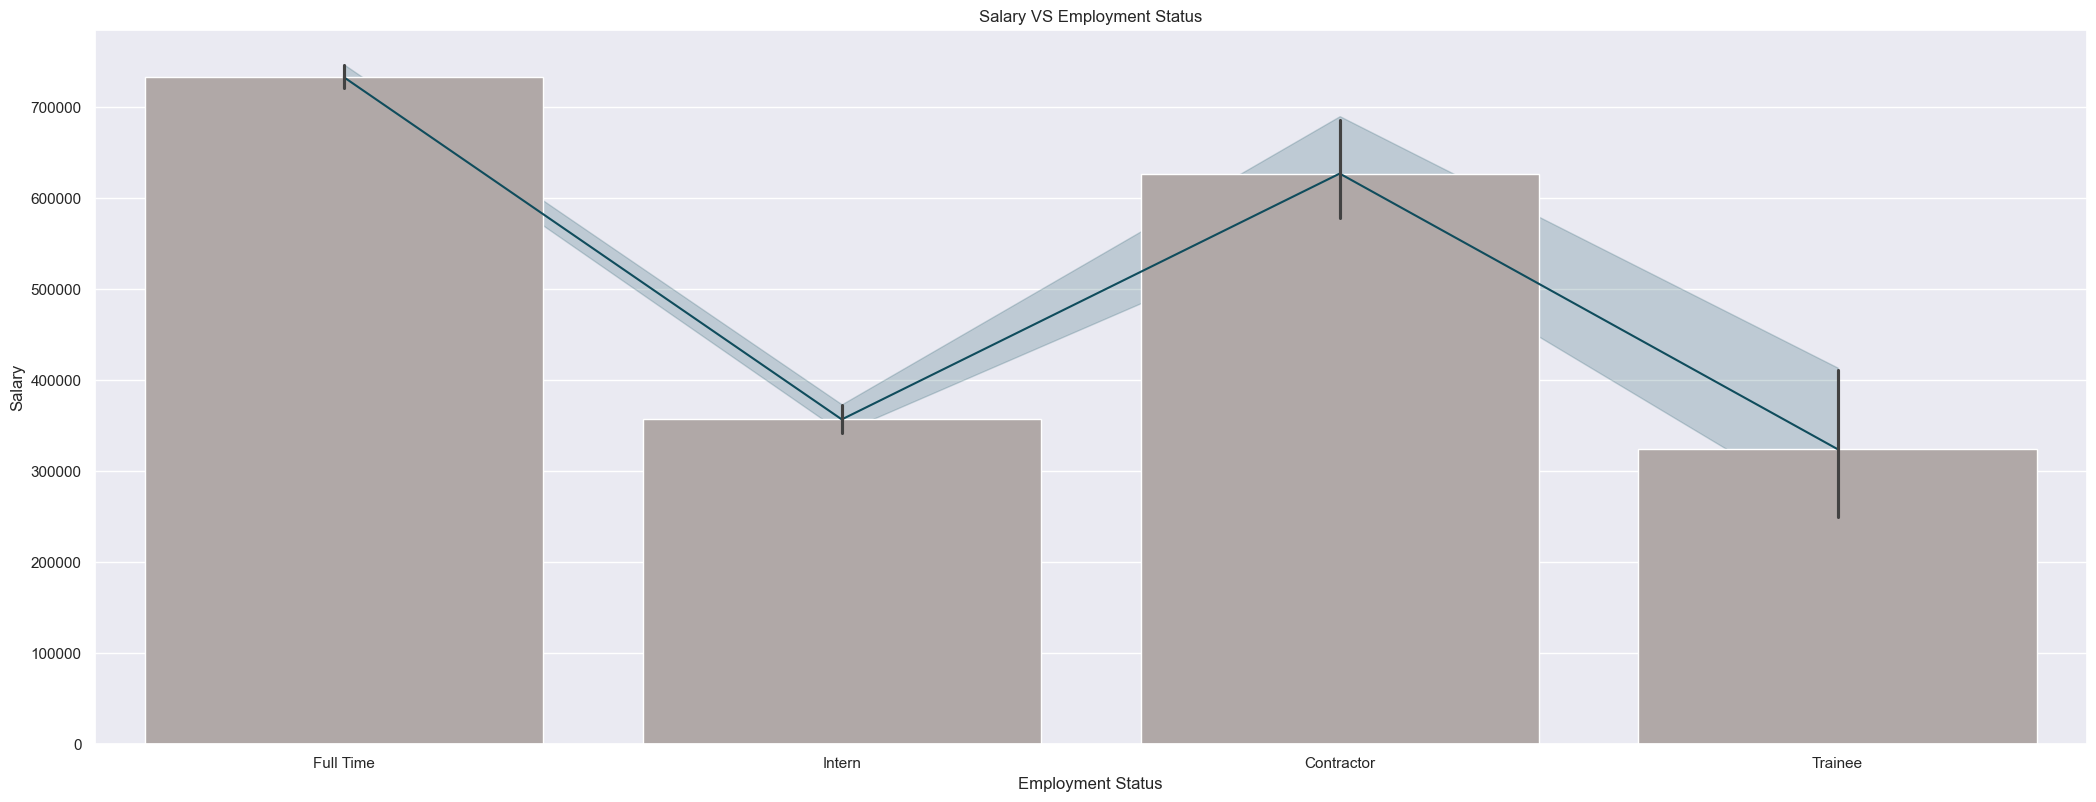

In [11]:
# How does Salary change with Employment status?
sns.set(rc={'figure.figsize':(25.7,9.27)})
figure_1 = sns.lineplot(data=salary_data, x="Employment Status", y="Salary", color="#0f4c5c")
figure_1 = sns.barplot(data=salary_data, x="Employment Status", y="Salary", color="#b1a7a6")

# Descriptions
plt.title("Salary VS Employment Status")
plt.show()